In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Understanding About the Data!
## 1. Let's Check Percentage of Missing Null Values
## 2. Let's Try to see the Correlation between the Attributes
## 3. Let's do some Plotting!

In [2]:
df = pd.read_csv("gdp_dataset.csv")
df.head()
df.rename({'West Bengal1' : 'West Bengal'} , axis = 'columns')

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.00,11063.00,143175.00,247144.00,158074.00,42367.00,615606.00,297539.00,...,359433.00,19208.00,724049.00,115523.00,NaN,3979.00,18768.00,343767.00,16818.00,8736039.00
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.00,12547.00,156864.00,282368.00,177511.00,38120.00,724495.00,347032.00,...,401493.00,21663.00,822903.00,131835.00,NaN,4421.00,21609.00,391238.00,18875.00,9946636.00
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.00,14602.00,177745.00,317101.00,206690.00,35921.00,807623.00,400662.00,...,452186.00,25593.00,944146.00,149817.00,NaN,5159.00,24787.00,443783.00,21870.00,11236635.00
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.00,16761.00,198098.00,373920.00,234982.00,40633.00,895027.00,437462.00,...,511178.00,29667.00,1043371.00,161985.00,NaN,5721.00,27844.00,492424.00,24089.00,12433749.00
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.00,18784.00,224234.00,413503.00,260776.00,45002.00,994316.00,485184.00,...,575631.00,NaN,1153795.00,184091.00,NaN,NaN,30304.00,551963.00,26533.00,13675331.00
5,GSDP - CURRENT PRICES (` in Crore),2016-17,699307.00,NaN,NaN,NaN,290140.00,NaN,NaN,547396.00,...,654294.00,NaN,NaN,NaN,NaN,NaN,NaN,622385.00,29557.00,15251028.00
6,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,...,11.70,12.78,13.65,14.12,NaN,11.13,15.14,13.81,12.23,13.86
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,12.63,18.14,14.73,13.64,NaN,16.68,14.71,13.43,15.87,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,13.05,15.92,10.51,8.12,NaN,10.89,12.33,10.96,10.14,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,12.61,NaN,10.58,13.65,NaN,NaN,8.84,12.09,10.15,9.99


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 36 columns):
Items  Description           11 non-null object
Duration                     11 non-null object
Andhra Pradesh               11 non-null float64
Arunachal Pradesh            9 non-null float64
Assam                        9 non-null float64
Bihar                        9 non-null float64
Chhattisgarh                 11 non-null float64
Goa                          9 non-null float64
Gujarat                      9 non-null float64
Haryana                      11 non-null float64
Himachal Pradesh             7 non-null float64
Jammu & Kashmir              9 non-null float64
Jharkhand                    9 non-null float64
Karnataka                    9 non-null float64
Kerala                       9 non-null float64
Madhya Pradesh               11 non-null float64
Maharashtra                  7 non-null float64
Manipur                      7 non-null float64
Meghalaya                    

In [4]:
df.describe()

,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
count,11.000000,9.000000,9.000000,9.000000,11.000000,9.000000,9.000000,11.000000,7.000000,9.000000,...,11.000000,7.000000,9.000000e+00,9.000000,0.0,7.000000,9.000000,11.000000,11.000000,1.100000e+01
mean,280986.561818,8201.516667,100018.167778,181565.673333,120748.879091,22450.120000,448568.674444,228667.271818,50673.064286,53343.001111,...,268570.787273,13739.691429,5.209237e+05,82588.947778,NaN,2759.814286,13707.002222,258693.004545,12527.435455,6.479952e+06
std,282573.532407,8073.276061,97589.497456,178700.497677,120928.480448,21443.429799,438025.627165,228195.895576,48384.121107,51712.668467,...,268734.549079,13240.797263,5.087288e+05,80553.858327,NaN,2627.016700,13399.003286,258176.516280,12445.889343,6.433000e+06
min,8.430000,12.070000,9.560000,10.590000,10.980000,-10.020000,10.820000,9.180000,10.140000,4.700000,...,11.700000,12.780000,1.051000e+01,8.120000,NaN,10.890000,8.840000,10.960000,10.140000,9.990000e+00
25%,14.025000,14.790000,13.190000,14.250000,12.995000,10.750000,11.470000,14.135000,14.155000,11.310000,...,12.840000,17.030000,1.365000e+01,13.650000,NaN,13.905000,14.710000,13.095000,11.815000,1.224500e+01
50%,379402.000000,11063.000000,143175.000000,247144.000000,158074.000000,35921.000000,615606.000000,297539.000000,72720.000000,78254.000000,...,359433.000000,19208.000000,7.240490e+05,115523.000000,NaN,3979.000000,18768.000000,343767.000000,16818.000000,8.736039e+06
75%,495370.000000,14602.000000,177745.000000,317101.000000,220836.000000,40633.000000,807623.000000,419062.000000,88792.000000,95893.000000,...,481682.000000,23628.000000,9.441460e+05,149817.000000,NaN,4790.000000,24787.000000,468103.500000,22979.500000,1.183519e+07
max,699307.000000,18784.000000,224234.000000,413503.000000,290140.000000,45002.000000,994316.000000,547396.000000,104369.000000,118387.000000,...,654294.000000,29667.000000,1.153795e+06,184091.000000,NaN,5721.000000,30304.000000,622385.000000,29557.000000,1.525103e+07


In [5]:
round(100*(df.isnull().sum()/len(df.index)))

Items  Description             0.0
Duration                       0.0
Andhra Pradesh                 0.0
Arunachal Pradesh             18.0
Assam                         18.0
Bihar                         18.0
Chhattisgarh                   0.0
Goa                           18.0
Gujarat                       18.0
Haryana                        0.0
Himachal Pradesh              36.0
Jammu & Kashmir               18.0
Jharkhand                     18.0
Karnataka                     18.0
Kerala                        18.0
Madhya Pradesh                 0.0
Maharashtra                   36.0
Manipur                       36.0
Meghalaya                      0.0
Mizoram                       36.0
Nagaland                      36.0
Odisha                         0.0
Punjab                        36.0
Rajasthan                     36.0
Sikkim                        18.0
Tamil Nadu                     0.0
Telangana                      0.0
Tripura                       36.0
Uttar Pradesh       

#### Here we can see that the Column for 'West Bengal' is totally empty, so either we drop it or we read in another dataframe and merge/concatenate based on an Index or Similar column.

In [6]:
df = df.dropna(axis = 1, how = 'all')

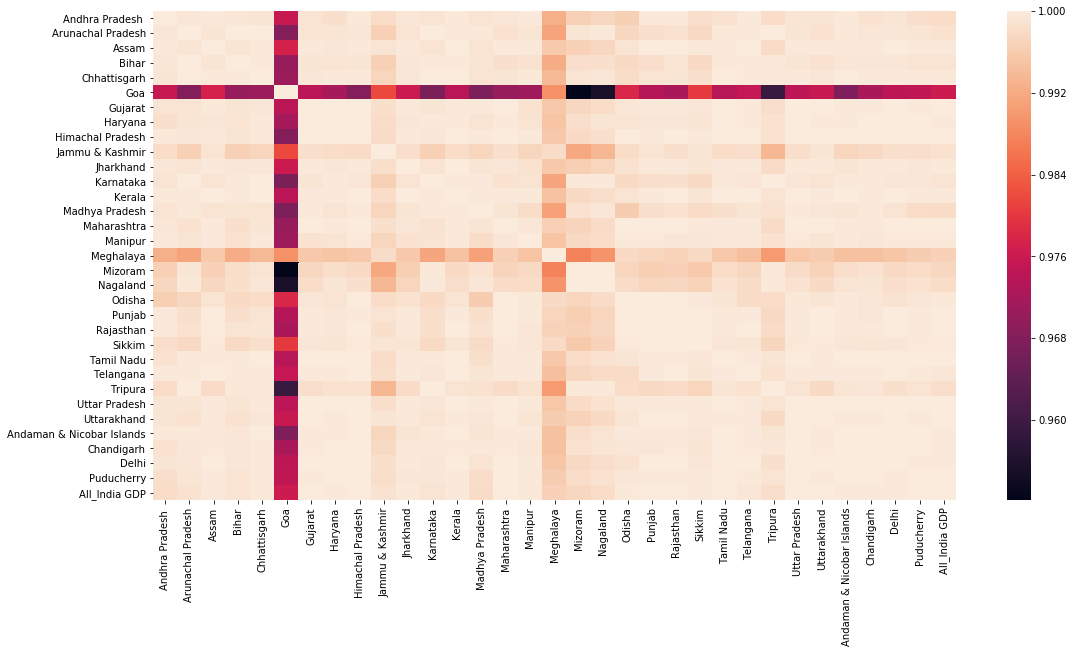

In [7]:
plt.figure(figsize=(18,9))
cor = df.corr()
sns.heatmap(cor)

df.describe()

df.shape
plt.savefig('corr_into.jpg')
#We don't wanna deduce something too early from Correlation but, we can say that there is a liklehood that Some states do depend on other States irrespective of culture or any attribute

sns.pairplot(data=exp, hue = 'Duration')
plt.show()

#This Keeps on giving error because we have an UNCLEANED Data Set. So let's start cleaning it!

# Part I-A
#### 1. Remove the rows: '(% Growth over the previous year)' and 'GSDP - CURRENT PRICES (` in Crore)' for the year 2016-17.

In [8]:
# We deselct the rows where the Duration is for '2016-17'
df = df[df.Duration != '2016-17']
df

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.00,11063.00,143175.00,247144.00,158074.00,42367.00,615606.00,297539.00,...,751485.00,359433.00,19208.00,724049.00,115523.00,3979.00,18768.00,343767.00,16818.00,8736039.00
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.00,12547.00,156864.00,282368.00,177511.00,38120.00,724495.00,347032.00,...,855481.00,401493.00,21663.00,822903.00,131835.00,4421.00,21609.00,391238.00,18875.00,9946636.00
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.00,14602.00,177745.00,317101.00,206690.00,35921.00,807623.00,400662.00,...,971090.00,452186.00,25593.00,944146.00,149817.00,5159.00,24787.00,443783.00,21870.00,11236635.00
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.00,16761.00,198098.00,373920.00,234982.00,40633.00,895027.00,437462.00,...,1092564.00,511178.00,29667.00,1043371.00,161985.00,5721.00,27844.00,492424.00,24089.00,12433749.00
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.00,18784.00,224234.00,413503.00,260776.00,45002.00,994316.00,485184.00,...,1212668.00,575631.00,NaN,1153795.00,184091.00,NaN,30304.00,551963.00,26533.00,13675331.00
6,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,...,13.84,11.70,12.78,13.65,14.12,11.13,15.14,13.81,12.23,13.86
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,13.51,12.63,18.14,14.73,13.64,16.68,14.71,13.43,15.87,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,12.51,13.05,15.92,10.51,8.12,10.89,12.33,10.96,10.14,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,10.99,12.61,NaN,10.58,13.65,NaN,8.84,12.09,10.15,9.99


#### Calculate the average growth of states for the duration 2013-14, 2014-15 and 2015-16 by taking the mean of the row '(% Growth over previous year)'. Compare the calculated values and plot them for the states. Make appropriate transformations, if necessary, to plot the data. Report the average growth rates of the various states:

##### Which states have been growing consistently fast, and which ones have been struggling?

##### Curiosity exercise: What has been the average growth rate of your home state, and how does it compare to the national average over this duration?

In [9]:
df.columns = df.columns.str.strip()

In [10]:
Growth_over_previous_year = df.groupby(['Items  Description']).get_group(('(% Growth over previous year)'))
Growth_over_previous_year

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
6,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,...,13.84,11.70,12.78,13.65,14.12,11.13,15.14,13.81,12.23,13.86
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,13.51,12.63,18.14,14.73,13.64,16.68,14.71,13.43,15.87,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,12.51,13.05,15.92,10.51,8.12,10.89,12.33,10.96,10.14,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,10.99,12.61,NaN,10.58,13.65,NaN,8.84,12.09,10.15,9.99


In [11]:
Mean_over_Growth_over_previous_year = Growth_over_previous_year.groupby('Duration').mean().reset_index()
Mean_over_Growth_over_previous_year = Mean_over_Growth_over_previous_year[Mean_over_Growth_over_previous_year.Duration !='2012-13']
Mean_over_Growth_over_previous_year

,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,...,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
1,2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,14.42,...,13.51,12.63,18.14,14.73,13.64,16.68,14.71,13.43,15.87,12.97
2,2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,10.14,...,12.51,13.05,15.92,10.51,8.12,10.89,12.33,10.96,10.14,10.65
3,2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,NaN,...,10.99,12.61,NaN,10.58,13.65,NaN,8.84,12.09,10.15,9.99


### Since we have missing values for a specific duration for many of the States, I am trying to impute the data by taking mean of the Column Values and filling it in the place if NaN to make a more realistic Data Frame 

In [12]:
Mean_over_Growth_over_previous_year.fillna(round(Mean_over_Growth_over_previous_year.mean(),1),inplace=True)

In [13]:
unionterritories = ['Delhi','Chandigarh','Puducherry', 'Andaman & Nicobar Islands']
Mean_over_Growth_over_previous_year.drop(unionterritories , axis = 'columns',inplace=True)

### Now we plot the mean for all the Durations mentioned!

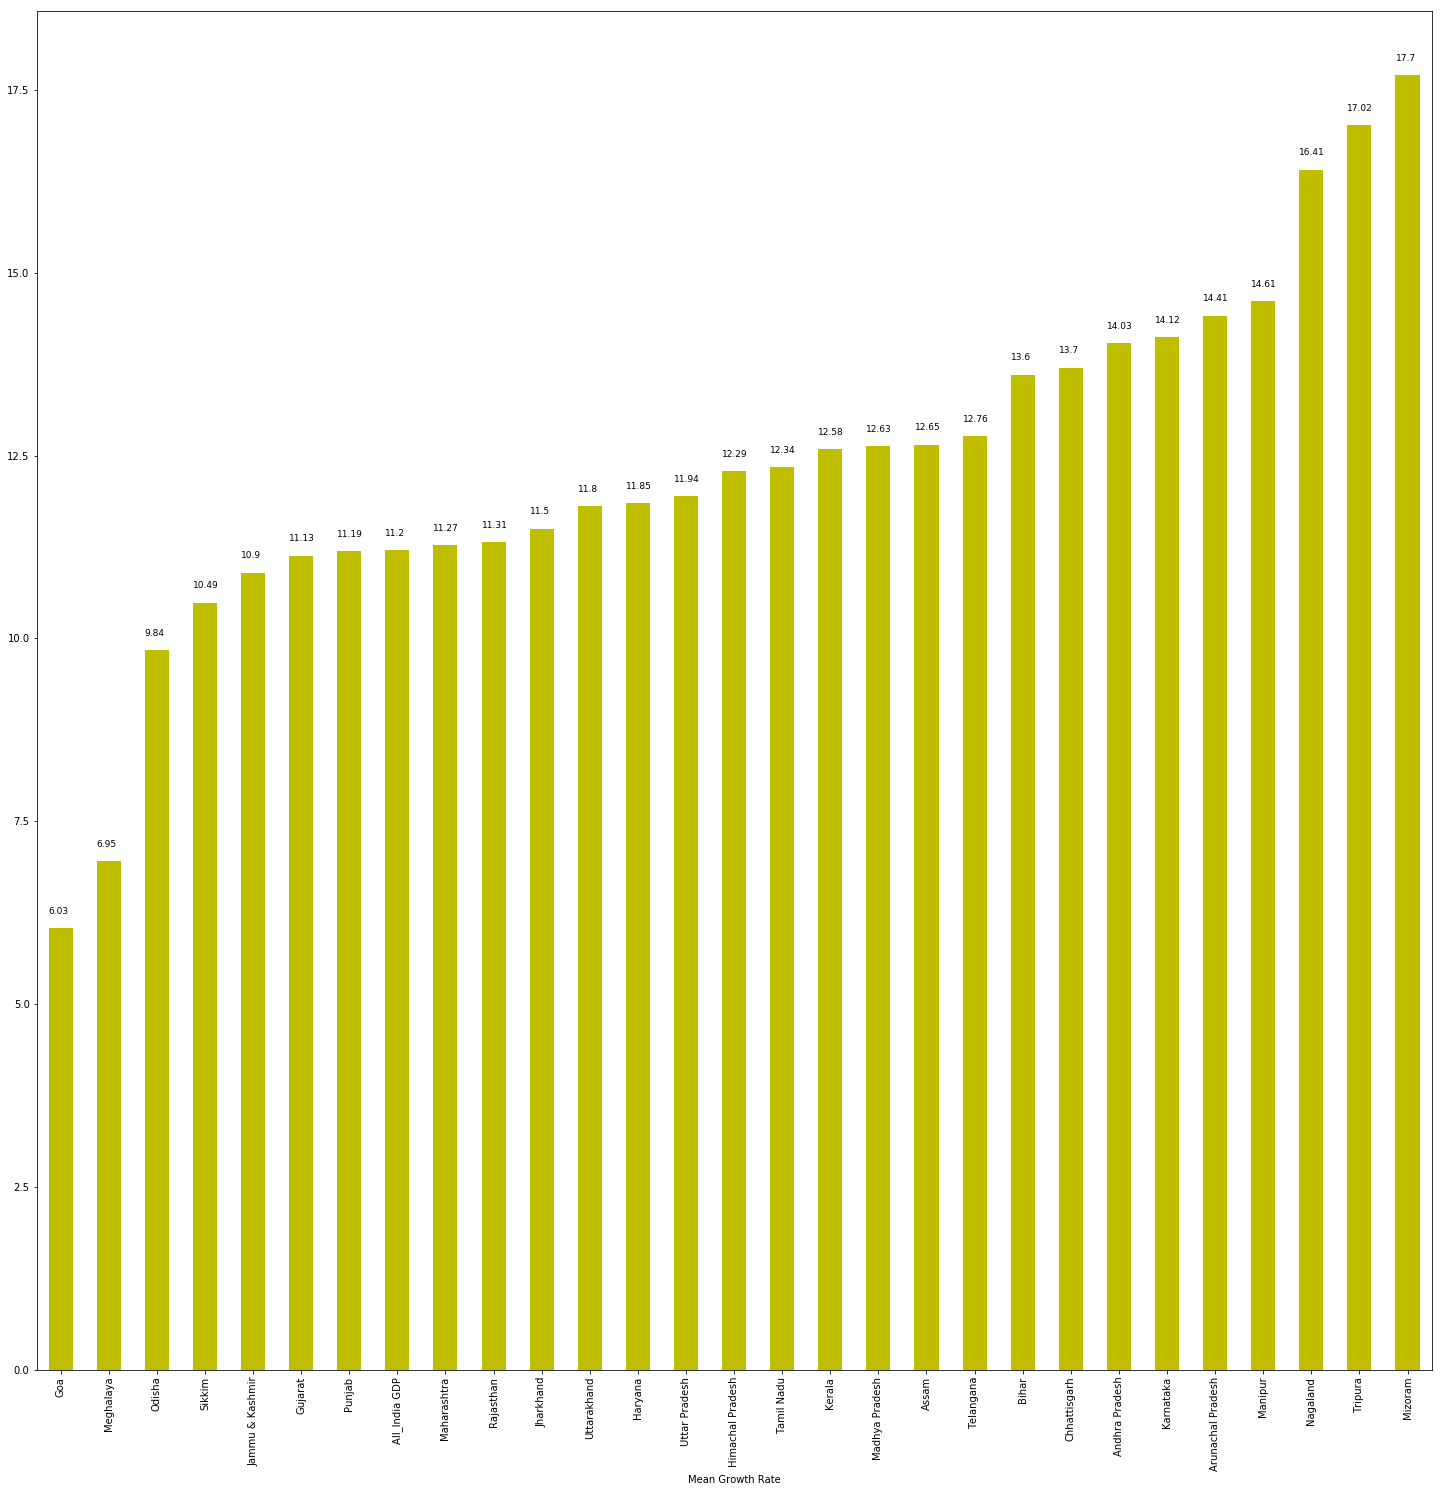

In [14]:
plt.figure(figsize=(25,25))
custom_duration = Mean_over_Growth_over_previous_year.iloc[[0,1,2]]
avg_growht = Mean_over_Growth_over_previous_year.iloc[[0,1,2]].mean().sort_values(axis=0)
p=avg_growht.plot.bar(color = 'y')
plt.xlabel('Mean Growth Rate')
for i in p.patches:
    p.text(i.get_x(), i.get_height()+.2,str(round(i.get_height(),2)),fontsize = 9)

plt.savefig('Mean_Frowth_over_states.jpg')
plt.show()


## Hence, Mizoram is the state performing best in the duration period of 2013 to 2016 and Goa is state struggling around there!

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

## We will try to look onto Mean Growth of States, State by State over the coursewise DUration in order to get more insights!

<Figure size 1440x1080 with 0 Axes>

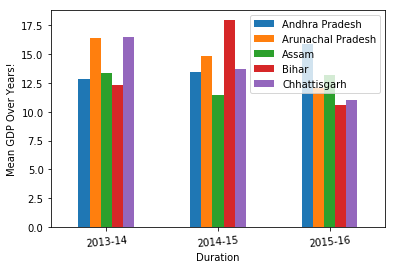

In [16]:
plt.figure(figsize = (20,15));
states = ['Andhra Pradesh','Arunachal Pradesh','Assam','Bihar','Chhattisgarh',
          'Goa',
          'Gujarat',
          'Haryana',
          'Himachal Pradesh',
          'Jammu & Kashmir',
          'Jharkhand',
          'Karnataka',
          'Kerala',
          'Madhya Pradesh',
          'Maharashtra',
          'Manipur',
          'Meghalaya',
          'Mizoram',
          'Nagaland',
          'Odisha',
          'Punjab',
          'Rajasthan',
          'Sikkim',
          'Tamil Nadu',
          'Telangana',
          'Tripura',
          'Uttar Pradesh',
          'Uttarakhand',
          'All_India GDP']
custom_duration.plot.bar(x = 'Duration' , y = states[:5], rot = 5);
plt.ylabel('Mean GDP Over Years!')
plt.savefig('Mean_GDP_Over_years_1.jpg')

<Figure size 1600x720 with 0 Axes>

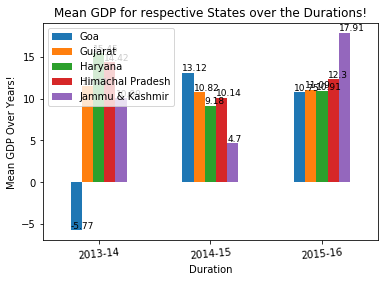

In [17]:
plt.figure(figsize = (20,9),dpi = 80)
cust = custom_duration.plot.bar(x = 'Duration' , y = states[5:10], rot = 5);
plt.ylabel('Mean GDP Over Years!')
for i in cust.patches:
    cust.text(i.get_x(), i.get_height()+.2,str(round(i.get_height(),2)),fontsize = 9)
plt.title('Mean GDP for respective States over the Durations!');
plt.savefig('Mean_GDP_Over_years_2.jpg')

<Figure size 1600x720 with 0 Axes>

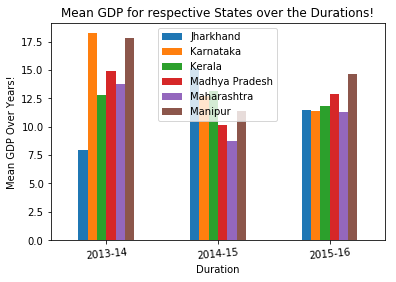

In [18]:
plt.figure(figsize = (20,9),dpi = 80)
custom_duration.plot.bar(x = 'Duration' , y = states[10:16], rot = 5);
plt.ylabel('Mean GDP Over Years!');
plt.title('Mean GDP for respective States over the Durations!');
plt.savefig('Mean_GDP_Over_years_3.jpg')

<Figure size 1600x720 with 0 Axes>

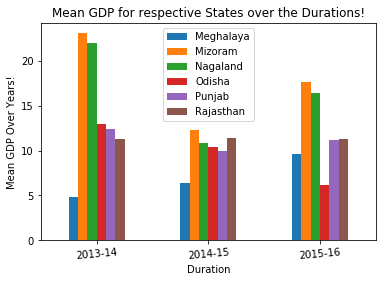

In [19]:
plt.figure(figsize = (20,9),dpi = 80)
custom_duration.plot.bar(x = 'Duration' , y = states[16:22], rot = 5);
plt.ylabel('Mean GDP Over Years!');
plt.title('Mean GDP for respective States over the Durations!');
plt.savefig('Mean_GDP_Over_years_4.jpg')

<Figure size 1600x720 with 0 Axes>

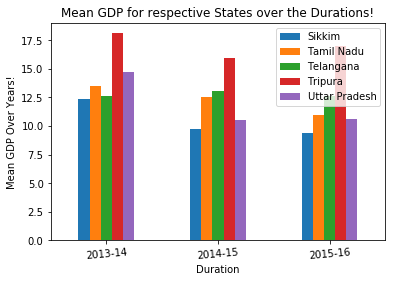

In [20]:
plt.figure(figsize = (20,9),dpi = 80)
custom_duration.plot.bar(x = 'Duration' , y = states[22:27], rot = 5);
plt.ylabel('Mean GDP Over Years!');
plt.title('Mean GDP for respective States over the Durations!');
plt.savefig('Mean_GDP_Over_years_5.jpg')

<Figure size 1600x720 with 0 Axes>

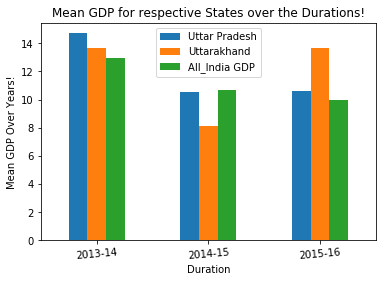

In [21]:
plt.figure(figsize = (20,9),dpi = 80)
custom_duration.plot.bar(x = 'Duration' , y = states[26:], rot = 5,align = 'center');
plt.ylabel('Mean GDP Over Years!');
plt.title('Mean GDP for respective States over the Durations!');
plt.savefig('Mean_GDP_Over_years_6.jpg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


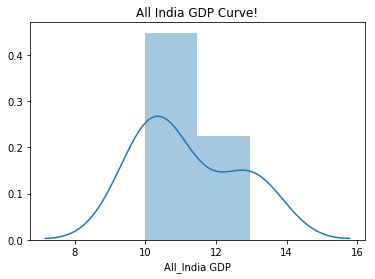

In [22]:
# We got to know that GOA has been 
sns.distplot(custom_duration['All_India GDP']);
plt.title('All India GDP Curve!');

## We find out that State : 'Goa' has rapidly grown it's GDP and perfomed better on the course of 2104-15 and 2015-16, but still struggling on Average Growth Rate!

## Also, State 'Sikkim' has been struggling to keep up with the GDP Achieved and maintained.

## Also State 'Manipur' has achieved some height in comparison to other states.

### Below Line Plot displays the act of Manipur

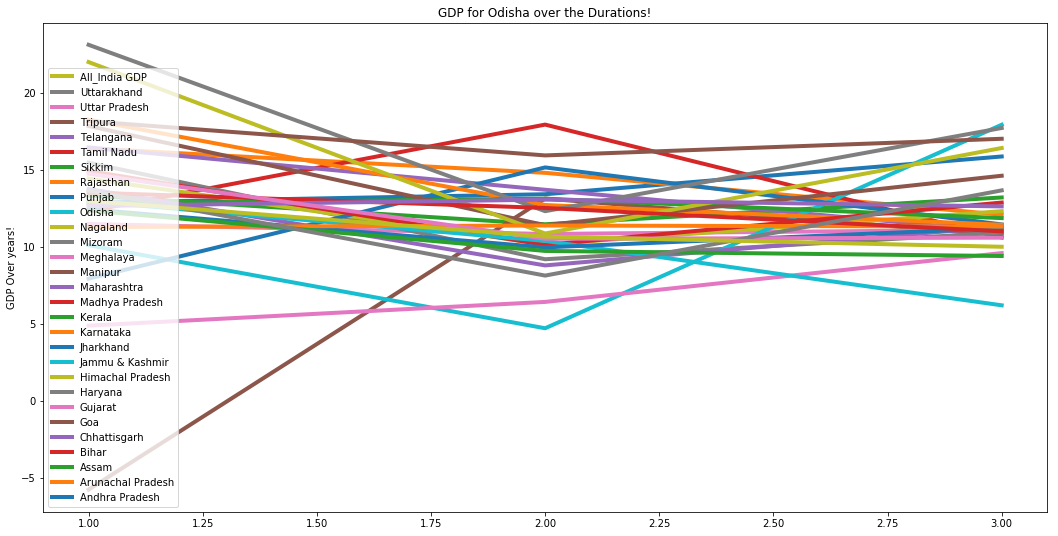

In [23]:
custom_duration.plot(kind = 'line',legend ='reverse',figsize = (18,9),lw=4)
plt.ylabel('GDP Over years!');
plt.title('GDP for Odisha over the Durations!');
plt.show()

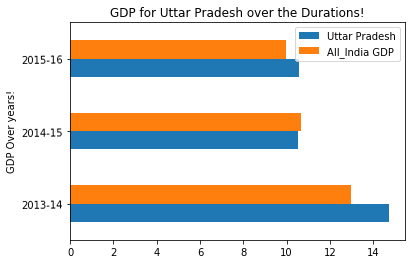

In [24]:
# My native State is Uttar Pradesh, let's see how it behaves against the Total India GDP:
custom_duration.plot.barh(x = 'Duration' , y = ['Uttar Pradesh', 'All_India GDP'], rot = 0.8)
plt.ylabel('GDP Over years!');
plt.title('GDP for Uttar Pradesh over the Durations!');
plt.savefig('Mean_GDP_Over_years_UP.jpg')

### We see that there is a neck-to-neck competition between UP's GDP and All India's GDP and UP overcame the total GDP in the year of 2013-14 and performed slightly better in 2015-16

#### Now being Orissa's current Resident, let's plot this State also against INDIA's GDP

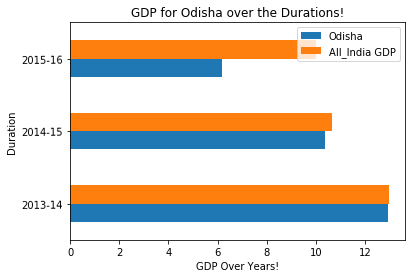

In [25]:
custom_duration.plot.barh(x = 'Duration' , y= ['Odisha','All_India GDP'],rot = 0.5 );
plt.xlabel('GDP Over Years!');
plt.title('GDP for Odisha over the Durations!');
plt.savefig('Mean_GDP_Over_years_Odisha.jpg')

## We see that Odisha was performing well to catch up with All India's GDP and had managed in 2013-14, but again it needs to improve.

# Now we will look at total GDP for the Duration of 2015-16:

In [26]:
pd.set_option('display.max_columns' ,500)
ut = ['Delhi','Chandigarh','Puducherry', 'Andaman & Nicobar Islands','All_India GDP']
df_1 = df.groupby('Items  Description').get_group(('GSDP - CURRENT PRICES (` in Crore)'))
df_1 = df_1[df_1.Duration == '2015-16']
df_1.drop(ut,axis = 'columns', inplace=True)
df_1.dropna(axis='columns',inplace = True)
df_1.drop(['Items  Description' , 'Duration'] , axis = 'columns' , inplace=True)
l = df_1.columns.tolist()
df_1

,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Jammu & Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Meghalaya,Odisha,Sikkim,Tamil Nadu,Telangana,Uttar Pradesh,Uttarakhand
4,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,118387.0,241955.0,1027068.0,588337.0,543975.0,26745.0,341887.0,16637.0,1212668.0,575631.0,1153795.0,184091.0


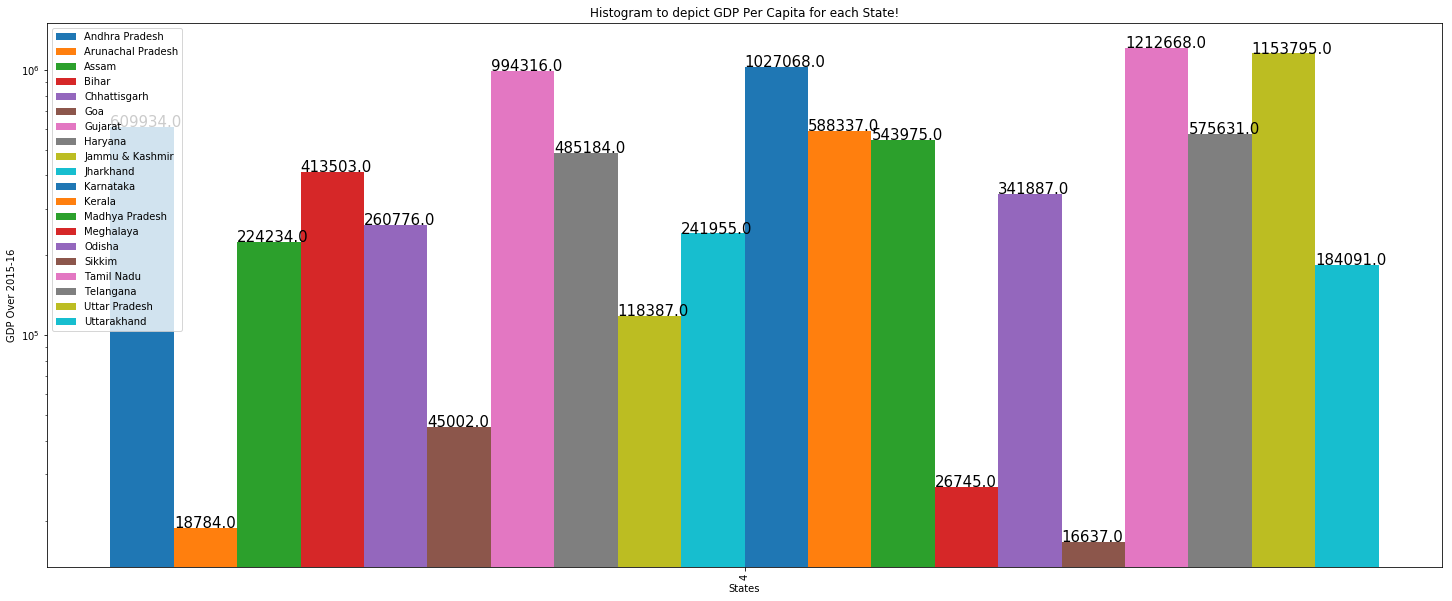

In [27]:
df_1_plot = df_1.plot.bar(width = 5,figsize=(25,10));
#plt.legend(loc = 'center',bbox_to_anchor = (0.6 , 1.0) ,shadow = True,ncol=2)
plt.ylabel('GDP Over 2015-16')
plt.xlabel('States')
#plt.yscale('log')
plt.yscale('log')
for i in df_1_plot.patches:
    df_1_plot.text(i.get_x(), i.get_height()+.2,str(round(i.get_height(),2)),fontsize = 15)

plt.title('Histogram to depict GDP Per Capita for each State!');
plt.savefig('GDP_Per_capita_for States_over2013_16.jpg')

### For top performing States, Tamil Nadu holds the highest GDP of Rupees 1212668.0
#### 5 Best performing states are : 1. Gujrat , 2. Andhra Pradesh , 3. Karnataka, 4. Uttar Pradesh and 5. Tamil Nadu!

### For low holding GDP State, Sikkim holds the lowest GDP of Rupees 16637.0

#### 5 Lowest performing States are: 1. Goa , 2. Uttrakhand , 3. Sikkim , 4. Meghalaya and 5. Arunachal Pradesh!

## Due to Data Quality Issues, some states have missing values and we cannot asssumptously fill them with mean or any other metric.

### Also using ForwardFill method or Backward Fill method does not applies here because of Types of Items Descriptions.

### So we have dropped the Null Values to be on a better evaluation!

# I-B:

### Perform Analysis for 2014-15
### Filter out the union territories (Delhi, Chandigarh, Andaman and Nicobar Islands, etc.) for further analysis, as they are governed directly by the centre, not state governments.

##### Plot the GDP per capita for all the states.
##### Identify the top 5 and the bottom 5 states based on the GDP per capita.
##### Find the ratio of the highest per capita GDP to the lowest per capita GDP.

In [28]:
#Load all States Data Set!
pd.set_option('display.max_columns' ,500)
import glob
states_1 = ['Andhra Pradesh','Arunachal Pradesh','Assam','Bihar','Chhattisgarh',
          'Goa',
          'Gujarat',
          'Haryana',
          'Himachal Pradesh',
          'Jammu & Kashmir',
          'Jharkhand',
          'Karnataka',
          'Kerala',
          'Madhya Pradesh',
          'Maharashtra',
          'Manipur',
          'Meghalaya',
          'Mizoram',
          'Nagaland',
          'Odisha',
          'Punjab',
          'Rajasthan',
          'Sikkim',
          'Tamil Nadu',
          'Telangana',
          'Tripura',
          'Uttar Pradesh',
          'Uttarakhand']

master_frame = []
for infile in glob.glob("E:\\UpGrad_Data Science\\Statistics and EDA\\GDP_Assignment\\states_csvs\\*.csv"):
    s = infile.split("-")
    data = pd.read_csv(infile,encoding = 'iso-8859-1')
    # We create a metric 'State' in order to avoid multiindex as I was having a hard time dealing with Multi Index
    data['State']=s[1].replace('_','')
    df2=data[['Item','State','2014-15']]
    master_frame.append(df2)


master_df = pd.concat(master_frame , axis=0)
#master_df = master_df.reset_index(level=1,drop=True)
#master_df = master_df[data.columns]
master_df

,Item,State,2014-15
0,"Agriculture, forestry and fishing",AndhraPradesh,14819416.0
1,Crops,AndhraPradesh,7893514.0
2,Livestock,AndhraPradesh,4309078.0
3,Forestry and logging,AndhraPradesh,346160.0
4,Fishing and aquaculture,AndhraPradesh,2270664.0
5,Mining and quarrying,AndhraPradesh,1484300.0
6,Primary,AndhraPradesh,16303716.0
7,Manufacturing,AndhraPradesh,4672266.0
8,"Electricity, gas, water supply & other utility...",AndhraPradesh,1151729.0
9,Construction,AndhraPradesh,4664889.0


## Let's create a Data Frame for GDP Per Capita for All states and then Visualize!

In [29]:
Per_Capita_GSDP=master_df[master_df.Item == 'Per Capita GSDP (Rs.)']
Per_Capita_GSDP.sort_values(by='2014-15')

,Item,State,2014-15
32,Per Capita GSDP (Rs.),Bihar,33954.0
32,Per Capita GSDP (Rs.),UttarPradesh,49450.0
32,Per Capita GSDP (Rs.),Manipur,58442.0
32,Per Capita GSDP (Rs.),Assam,60621.0
32,Per Capita GSDP (Rs.),Jharkhand,62091.0
32,Per Capita GSDP (Rs.),MadhyaPradesh,62989.0
32,Per Capita GSDP (Rs.),Odisha,73979.0
32,Per Capita GSDP (Rs.),JammuKashmir,75840.0
32,Per Capita GSDP (Rs.),Meghalaya,76228.0
32,Per Capita GSDP (Rs.),Tripura,77358.0


## To calculate/plot GDP per Capita for Different States :

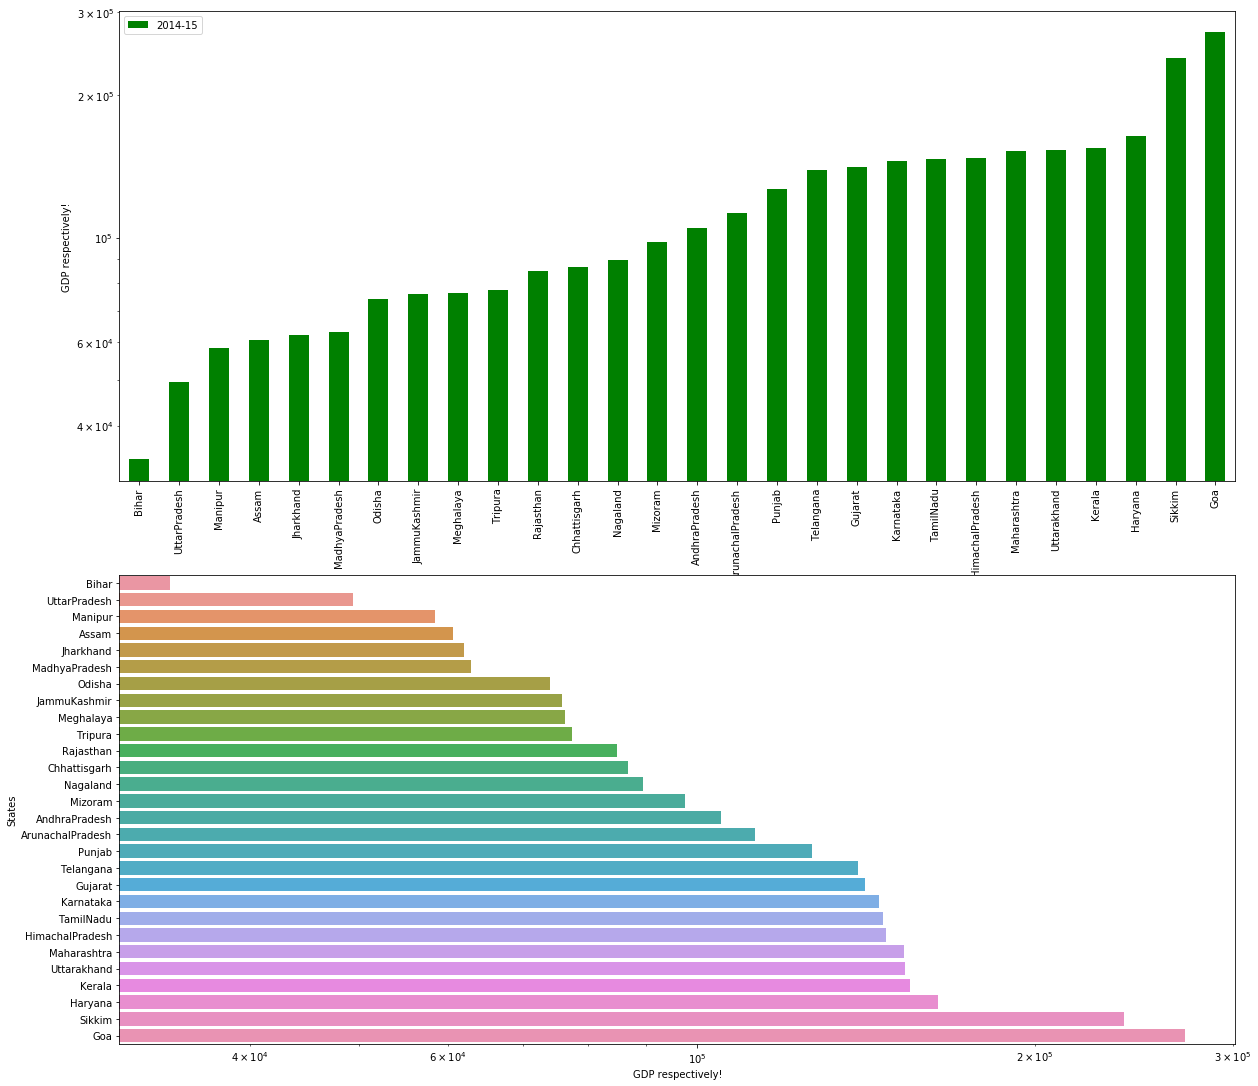

In [30]:
plt.figure(figsize=(20,19))
ax1 = plt.subplot(211)
#df_PerCapita = pd.DataFrame(l_states)
#df_PerCapita.index.str.replace('\d+','')
Per_Capita_GSDP.sort_values(by = '2014-15').plot(kind = 'bar',color='g',ax = ax1 , x = 'State' , y='2014-15')
#for i in ax1.patches:
#    ax1.text(i.get_x(), i.get_height()+.9,str(round(i.get_height(),2)),fontsize = 15)

plt.yscale('log')
plt.xlabel('States')
plt.ylabel('GDP respectively!')
ax2 = plt.subplot(212)
Per_Capita_GSDP = Per_Capita_GSDP.sort_values(by = '2014-15')
sns.barplot(data=Per_Capita_GSDP , y = 'State' , x = '2014-15',ax=ax2)
plt.xscale('log')
plt.ylabel('States')
plt.xlabel('GDP respectively!')
plt.savefig('GDP_Per_Capita_2014_15_2.jpg')
plt.show()


## Top 5 States are : Sikkim,Goa,Kerala,Haryana and Uttrakhan.

## Bottom 5 States are : Bihar,Uttar Pradesh, Manipur, Assam and Jharkhand

In [31]:
ration_high_low_Per_Capita = round(Per_Capita_GSDP['2014-15'].max()/Per_Capita_GSDP['2014-15'].min(),2)
ration_high_low_Per_Capita

8.0

## Ratio of the highest Per Capita(Punjab) to the lowest Per Capita(Bihar) is 8.0

# Now we will look at the % Contribution of Each Sector for each State.

## Sectors we refer are : 1. Primary 2 .Secondary and 3. Tertiary and they are in order
                                    

In [32]:
# needed sectors are here!
sectors_needed = ['Primary','Secondary','Tertiary','Gross State Domestic Product']
# for % calculation instead of dividing rows, we can divide each row by an another data frame on index
#sector_div = []
#df_sector_div = master_df.loc[master_df.Item.isin(sector_div)]
df_sectors = master_df.loc[master_df.Item.isin(sectors_needed)]
df_sectors

,Item,State,2014-15
6,Primary,AndhraPradesh,16303716.0
10,Secondary,AndhraPradesh,10488884.0
26,Tertiary,AndhraPradesh,22032942.0
30,Gross State Domestic Product,AndhraPradesh,52646842.0
6,Primary,ArunachalPradesh,716959.0
10,Secondary,ArunachalPradesh,287489.0
26,Tertiary,ArunachalPradesh,631844.0
30,Gross State Domestic Product,ArunachalPradesh,1676119.0
6,Primary,Assam,5326697.0
10,Secondary,Assam,4033091.0


export_csv = df.to_csv(r'E:\UpGrad_Data Science\Statistics and EDA\GDP_Assignment\sectors_df.csv')

In [33]:
df_pivot = df_sectors.pivot_table(values = '2014-15', index = 'State',columns = 'Item' )
df_pivot

Item,Gross State Domestic Product,Primary,Secondary,Tertiary
State,,,,
AndhraPradesh,52646842.0,16303716.0,10488884.0,22032942.0
ArunachalPradesh,1676119.0,716959.0,287489.0,631844.0
Assam,19809800.0,5326697.0,4033091.0,9307109.0
Bihar,37391988.0,8019997.0,5984896.0,22179969.0
Chhattisgarh,23498180.0,6400817.0,8238886.0,7588778.0
Goa,4063307.0,312129.0,1547536.0,1738217.0
Gujarat,89502727.0,15887187.0,33023538.0,30220377.0
Haryana,43746207.0,8040424.0,12561411.0,19226568.0
HimachalPradesh,10436879.0,1548366.0,4119162.0,4133326.0


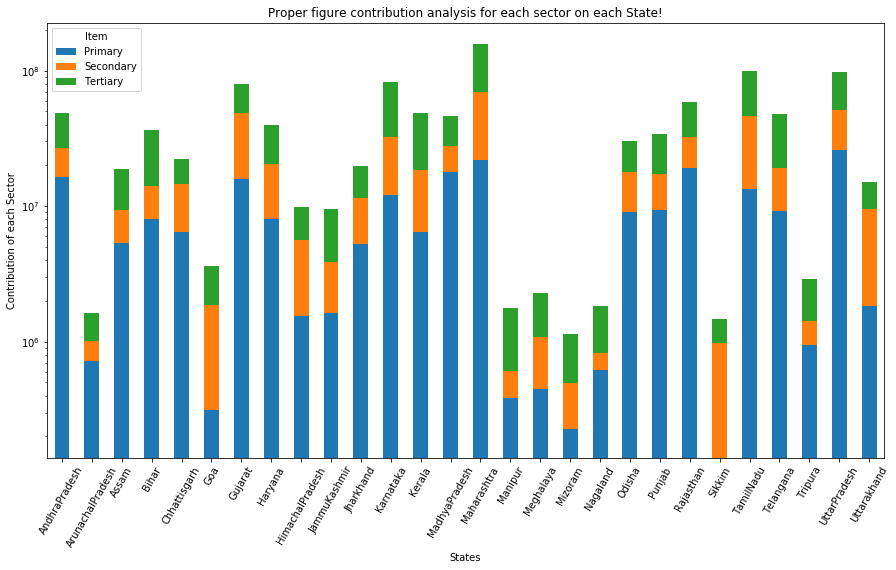

In [34]:
df_pivot.loc[:,['Primary','Secondary','Tertiary']].plot.bar(stacked=True,figsize = (15,8),rot = 60);
plt.yscale('log')
plt.xlabel('States')
plt.ylabel('Contribution of each Sector');
plt.title('Proper figure contribution analysis for each sector on each State!');
plt.savefig('Contribution_of_each_sector_towards_gdp.jpg')

In [35]:
#100*(df_sectors.Item[1,:]/df_sectors.Item[3,:])
#df_sectors.Item.value_counts()/len(df_sectors.Item)

# We create a metric of % Contribution in our df_sectors data frame and sort the data frame based on the %Contribution
df_pivot['% Contribution by Primary Sector'] = round(100*(df_pivot['Primary']/df_pivot['Gross State Domestic Product']),2)
df_pivot['% Contribution by Secondary Sector'] = round(100*(df_pivot['Secondary']/df_pivot['Gross State Domestic Product']),2)
df_pivot['% Contribution by Tertiary Sector'] = round(100*(df_pivot['Tertiary']/df_pivot['Gross State Domestic Product']),2)
#df_pivot.sort_values(by = '% Contribution to GSDP',inplace=True,ascending=True)
df_pivot

Item,Gross State Domestic Product,Primary,Secondary,Tertiary,% Contribution by Primary Sector,% Contribution by Secondary Sector,% Contribution by Tertiary Sector
State,,,,,,,
AndhraPradesh,52646842.0,16303716.0,10488884.0,22032942.0,30.97,19.92,41.85
ArunachalPradesh,1676119.0,716959.0,287489.0,631844.0,42.77,17.15,37.70
Assam,19809800.0,5326697.0,4033091.0,9307109.0,26.89,20.36,46.98
Bihar,37391988.0,8019997.0,5984896.0,22179969.0,21.45,16.01,59.32
Chhattisgarh,23498180.0,6400817.0,8238886.0,7588778.0,27.24,35.06,32.30
Goa,4063307.0,312129.0,1547536.0,1738217.0,7.68,38.09,42.78
Gujarat,89502727.0,15887187.0,33023538.0,30220377.0,17.75,36.90,33.76
Haryana,43746207.0,8040424.0,12561411.0,19226568.0,18.38,28.71,43.95
HimachalPradesh,10436879.0,1548366.0,4119162.0,4133326.0,14.84,39.47,39.60


## Now let us plot for each state a bar plot which has sticks(lower ends represents contribution of Primary Sector for that State, Tip end of stick reperesents contribution of Tertiary Sector and Secondary Sector is Middle point of Bars!

<Figure size 1296x648 with 0 Axes>

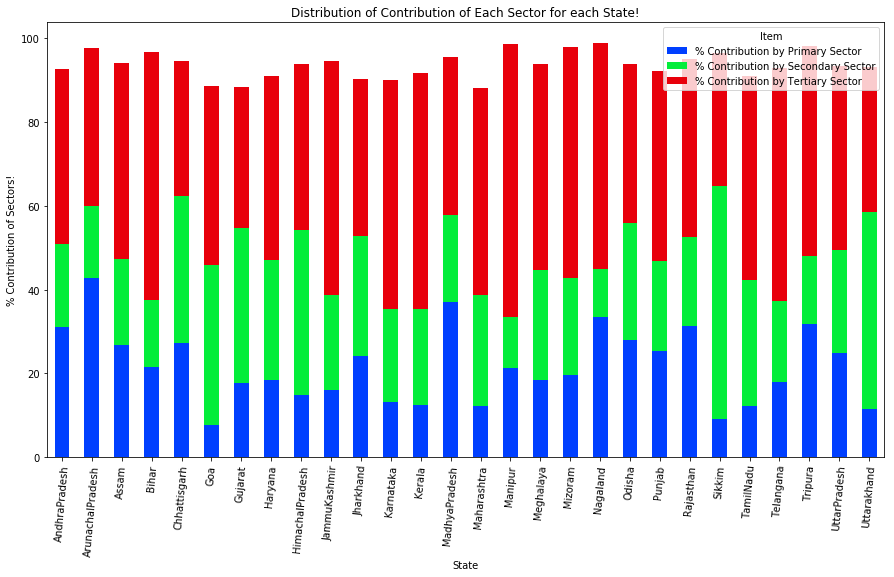

In [36]:
plt.figure(figsize=(18,9));
pal = sns.set_palette('bright')
#g = sns.barplot(data = df_pivot , x = df_pivot.State , y = '% Contribution by Primary Sector',palette = pal)
g = df_pivot.loc[:,['% Contribution by Primary Sector','% Contribution by Secondary Sector','% Contribution by Tertiary Sector']].plot.bar(stacked = True,figsize = (15,8),rot = 60);
g.set_xticklabels(df_pivot.index,rotation = 85);
#for i in g.patches:
 #   g.text(i.get_x(), i.get_height()+.2,str(round(i.get_height(),2)),fontsize = 12)

#df_sectors[['Item','% Contribution to GSDP']].plot(kind='bar',stacked=True,)
plt.ylabel('% Contribution of Sectors!');
plt.title('Distribution of Contribution of Each Sector for each State!');
plt.savefig('Percentage_of_Contribution_towards_GDP.jpg')

# We can make some remarks after looking at this data!

### Goa Contributes lowest in the primary sector but fairly in Secondary and tertiary sectors.
### Whereas Arunachal Pradesh contributes the highest in Primary Sector and fairly in Secondary but Strongly in Tertiary Sectors.

### Highest Contributor to Primary Sector: Arunachal Pradesh
### Highest Contributor to Secondary Sector: Sikkim
### Highest Contributor to Tertiary Sector: Manipur

# Now we will Categorize the Sectors and try to find the top 3/4/5 subsectors

In [37]:
Per_Capita_GSDP['Category'] = pd.qcut(x = Per_Capita_GSDP['2014-15'],q=[0,0.20,0.5,0.85,1],labels = ['C4','C3','C2','C1'])
Per_Capita_GSDP

,Item,State,2014-15,Category
32,Per Capita GSDP (Rs.),Bihar,33954.0,C4
32,Per Capita GSDP (Rs.),UttarPradesh,49450.0,C4
32,Per Capita GSDP (Rs.),Manipur,58442.0,C4
32,Per Capita GSDP (Rs.),Assam,60621.0,C4
32,Per Capita GSDP (Rs.),Jharkhand,62091.0,C4
32,Per Capita GSDP (Rs.),MadhyaPradesh,62989.0,C4
32,Per Capita GSDP (Rs.),Odisha,73979.0,C3
32,Per Capita GSDP (Rs.),JammuKashmir,75840.0,C3
32,Per Capita GSDP (Rs.),Meghalaya,76228.0,C3
32,Per Capita GSDP (Rs.),Tripura,77358.0,C3


In [38]:
sub_set = []
sub_set = Per_Capita_GSDP['2014-15']
C4_quantile = sub_set.quantile(0.2)
C3_quantile = sub_set.quantile(0.5)
C2_quantile =sub_set.quantile(0.85)
C1_quantile = sub_set.quantile(1)
Per_Capita_GSDP.loc[(Per_Capita_GSDP['2014-15']>0)&(Per_Capita_GSDP['2014-15']<=C4_quantile),"Group"] = "C4"
Per_Capita_GSDP.loc[(Per_Capita_GSDP['2014-15']>C4_quantile)&(Per_Capita_GSDP['2014-15']<=C3_quantile),"Group"] = "C3"
Per_Capita_GSDP.loc[(Per_Capita_GSDP['2014-15']>C3_quantile)&(Per_Capita_GSDP['2014-15']<=C2_quantile),"Group"] = "C2"
Per_Capita_GSDP.loc[(Per_Capita_GSDP['2014-15']>C2_quantile)&(Per_Capita_GSDP['2014-15']<=C1_quantile),"Group"] = "C1"
dfgroup = pd.merge(master_df,Per_Capita_GSDP, on='State',how = 'inner')
dfgroup.head(10)

,Item_x,State,2014-15_x,Item_y,2014-15_y,Category,Group
0,"Agriculture, forestry and fishing",AndhraPradesh,14819416.0,Per Capita GSDP (Rs.),104977.0,C2,C2
1,Crops,AndhraPradesh,7893514.0,Per Capita GSDP (Rs.),104977.0,C2,C2
2,Livestock,AndhraPradesh,4309078.0,Per Capita GSDP (Rs.),104977.0,C2,C2
3,Forestry and logging,AndhraPradesh,346160.0,Per Capita GSDP (Rs.),104977.0,C2,C2
4,Fishing and aquaculture,AndhraPradesh,2270664.0,Per Capita GSDP (Rs.),104977.0,C2,C2
5,Mining and quarrying,AndhraPradesh,1484300.0,Per Capita GSDP (Rs.),104977.0,C2,C2
6,Primary,AndhraPradesh,16303716.0,Per Capita GSDP (Rs.),104977.0,C2,C2
7,Manufacturing,AndhraPradesh,4672266.0,Per Capita GSDP (Rs.),104977.0,C2,C2
8,"Electricity, gas, water supply & other utility...",AndhraPradesh,1151729.0,Per Capita GSDP (Rs.),104977.0,C2,C2
9,Construction,AndhraPradesh,4664889.0,Per Capita GSDP (Rs.),104977.0,C2,C2


In [39]:
dfgroup = dfgroup.drop(['Item_y','Group','2014-15_y'],axis =1)
dfgroup.head(10)
dfgroup.columns.str.replace('_','')

Index(['Itemx', 'State', '2014-15x', 'Category'], dtype='object')

In [40]:
dfgroup.columns=['Item','State','2014-15','Category']
c1 = dfgroup.loc[dfgroup['Category'] == 'C1']
c2 = dfgroup.loc[dfgroup['Category'] == 'C2']
c3 = dfgroup.loc[dfgroup['Category'] == 'C3']
c4 = dfgroup.loc[dfgroup['Category'] == 'C4']
c1

,Item,State,2014-15,Category
165,"Agriculture, forestry and fishing",Goa,308507.0,C1
166,Crops,Goa,140421.0,C1
167,Livestock,Goa,30141.0,C1
168,Forestry and logging,Goa,15744.0,C1
169,Fishing and aquaculture,Goa,122201.0,C1
170,Mining and quarrying,Goa,3622.0,C1
171,Primary,Goa,312129.0,C1
172,Manufacturing,Goa,1177608.0,C1
173,"Electricity, gas, water supply & other utility...",Goa,204110.0,C1
174,Construction,Goa,165819.0,C1


## This is for C1 Category!

In [41]:
c1df = c1.groupby(by = 'Item' ,as_index=False).sum()
not_to_be_included = ['Primary','Secondary','Tertiary','Per Capita GSDP (Rs.)',"Population ('00)",
                     'Crops','Trade & repair services','Hotels & restaurants','Livestock','Forestry and logging',
                      'Fishing and aquaculture','Railways','Road transport','Water transport','Air transport','Road transport*',
                      'Road transport**','Trade & repair services*',
'Services incidental to transport','Storage','Communication & services related to broadcasting','TOTAL GSVA at basic prices',
'Taxes on Products','Subsidies on products',]
c1df = c1df[~c1df['Item'].isin(not_to_be_included)]
Gross_State_Domestic_Product = c1df.loc[c1df.Item == 'Gross State Domestic Product','2014-15'].iloc[0]
c1df = c1df.loc[c1df.Item!= 'Gross State Domestic Product']
c1df['Subsector Contri Individually'] = round(100*(c1df['2014-15']/Gross_State_Domestic_Product),2)
c1df = c1df.sort_values(by = 'Subsector Contri Individually',ascending = False)
c1df['Running Total'] = c1df['Subsector Contri Individually'].cumsum(axis=0)

# Top contributors to 80%
c1_Top = c1df[c1df['Running Total']<=80]
#c1_Top = c1_Top.sort_values(by = 'Running Total')
# Top 5 Contributors!
c1df.iloc[:5]

,Item,2014-15,Subsector Contri Individually,Running Total
12,Manufacturing,19625045.0,16.61,16.61
0,"Agriculture, forestry and fishing",15993232.0,13.54,30.15
33,"Trade, repair, hotels and restaurants",15738265.0,13.32,43.47
20,"Real estate, ownership of dwelling & professio...",15571552.0,13.18,56.65
3,Construction,12607184.0,10.67,67.32


## Top 3 Contributors in C1 Category are 'Manufacturing','Agriculture' , 'Trade, repair, hotels and restaurants', 'Real estate, ownership of dwelling & professional services' and 'Construction'

### Let's plot on individual Contribution and then on Running Total

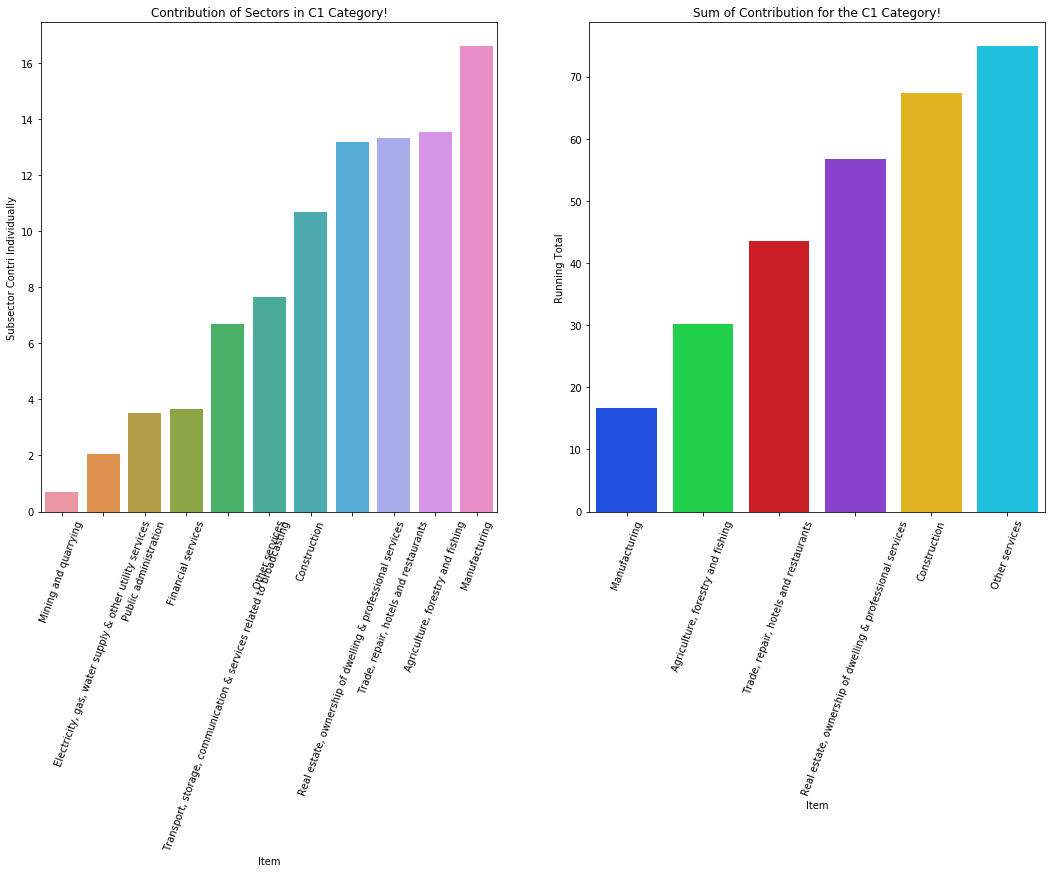

In [42]:
plt.figure(figsize=(18,9))
plt.subplot(1,2,1)
g = sns.barplot(data = c1df.sort_values(by = 'Subsector Contri Individually') , x = 'Item' , y = 'Subsector Contri Individually');
plt.xticks(rotation = 70);
plt.title('Contribution of Sectors in C1 Category!')
plt.subplot(1,2,2)
g = sns.barplot(data = c1_Top.sort_values(by = 'Running Total') , x = 'Item' , y ='Running Total')
plt.xticks(rotation = 70);
plt.title('Sum of Contribution for the C1 Category!');
plt.savefig('C1_Subsector_contribution.jpg')

# This is for C2 Category!

In [43]:
c2df = c2.groupby(by = 'Item' ,as_index=False).sum()
not_to_be_included = ['Primary','Secondary','Tertiary','Per Capita GSDP (Rs.)',"Population ('00)",
                     'Crops','Trade & repair services','Hotels & restaurants','Livestock','Forestry and logging',
                      'Fishing and aquaculture','Railways','Road transport','Water transport','Air transport','Road transport*',
                      'Road transport**','Trade & repair services*',
'Services incidental to transport','Storage','Communication & services related to broadcasting','TOTAL GSVA at basic prices',
'Taxes on Products','Subsidies on products',]
c2df = c2df[~c2df['Item'].isin(not_to_be_included)]
Gross_State_Domestic_Product = c2df.loc[c2df.Item == 'Gross State Domestic Product','2014-15'].iloc[0]
c2df = c2df.loc[c2df.Item!= 'Gross State Domestic Product']
c2df['Subsector Contri Individually'] = round(100*(c2df['2014-15']/Gross_State_Domestic_Product),2)
c2df = c2df.sort_values(by = 'Subsector Contri Individually',ascending = False)
c2df['Running Total'] = c2df['Subsector Contri Individually'].cumsum(axis=0)

# Top contributors to 80%
c2_Top = c2df[c2df['Running Total']<=80]
# Top 5 Contributors!
c2df.iloc[:5]

,Item,2014-15,Subsector Contri Individually,Running Total
12,Manufacturing,108002544.0,17.34,17.34
20,"Real estate, ownership of dwelling & professio...",95695548.0,15.36,32.70
0,"Agriculture, forestry and fishing",88427015.0,14.20,46.90
31,"Trade, repair, hotels and restaurants",63729156.0,10.23,57.13
3,Construction,43975718.0,7.06,64.19


## Top 3 Contributors in C2 Category are 'Manufacturing','Agriculture, forestry and fishing	' , 'Trade, repair, hotels and restaurants', 'Real estate, ownership of dwelling & professional services' and 'Construction'

### Let's plot on individual Contribution and then on Running Total

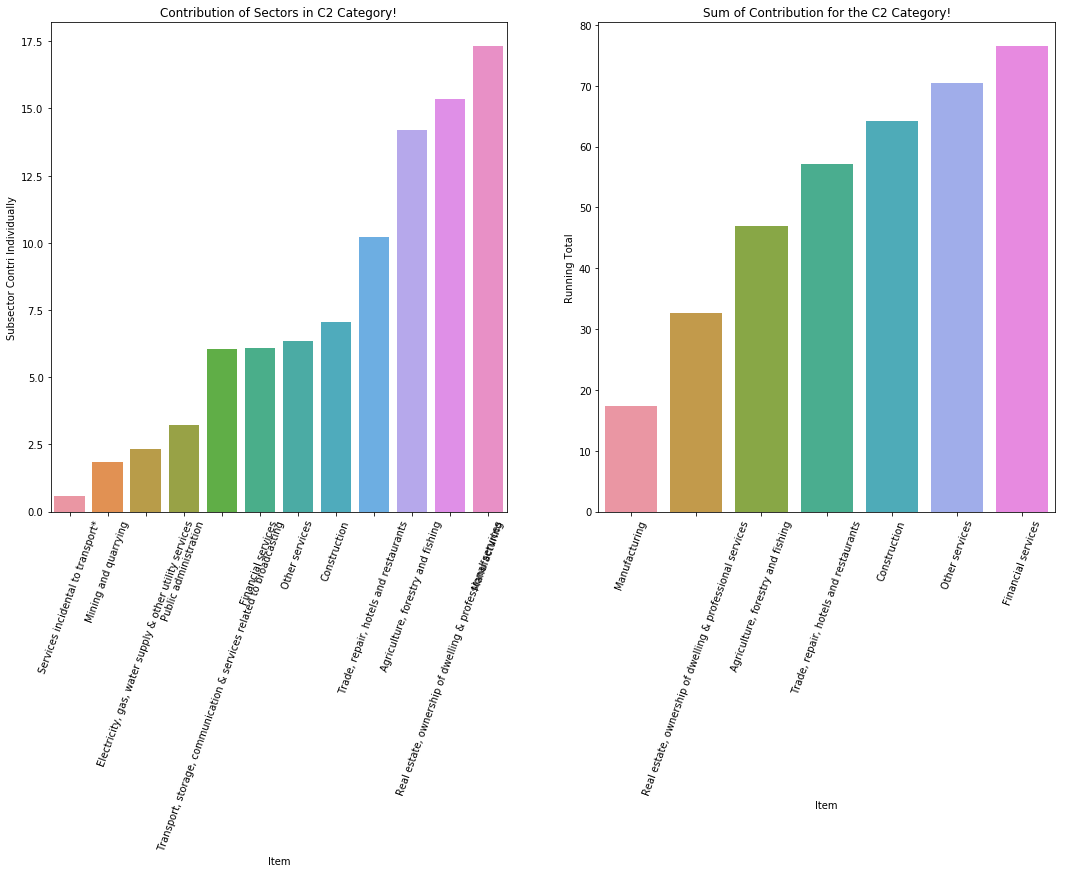

In [44]:
plt.figure(figsize=(18,9))
plt.subplot(1,2,1)
g = sns.barplot(data = c2df.sort_values(by = 'Subsector Contri Individually') , x = 'Item' , y = 'Subsector Contri Individually');
plt.xticks(rotation = 70);
plt.title('Contribution of Sectors in C2 Category!')
plt.subplot(1,2,2)
g = sns.barplot(data = c2_Top.sort_values(by = 'Running Total') , x = 'Item' , y ='Running Total')
plt.xticks(rotation = 70);
plt.title('Sum of Contribution for the C2 Category!');
plt.savefig('C2_Subsector_contribution.jpg')

# This is for C3 Category!

In [45]:
c3df = c3.groupby(by = 'Item' ,as_index=False).sum()
not_to_be_included = ['Primary','Secondary','Tertiary','Per Capita GSDP (Rs.)',"Population ('00)",
                     'Crops','Trade & repair services','Hotels & restaurants','Livestock','Forestry and logging',
                      'Fishing and aquaculture','Railways','Road transport','Water transport','Air transport','Road transport*',
                      'Road transport**','Trade & repair services*',
'Services incidental to transport','Storage','Communication & services related to broadcasting','TOTAL GSVA at basic prices',
'Taxes on Products','Subsidies on products',]
c3df = c3df[~c3df['Item'].isin(not_to_be_included)]
Gross_State_Domestic_Product = c3df.loc[c3df.Item == 'Gross State Domestic Product','2014-15'].iloc[0]
c3df = c3df.loc[c3df.Item!= 'Gross State Domestic Product']
c3df['Subsector Contri Individually'] = round(100*(c3df['2014-15']/Gross_State_Domestic_Product),2)
c3df = c3df.sort_values(by = 'Subsector Contri Individually',ascending = False)
c3df['Running Total'] = c3df['Subsector Contri Individually'].cumsum(axis=0)

# Top contributors to 80%
c3_Top = c3df[c3df['Running Total']<=80]
c3df.iloc[:5]

,Item,2014-15,Subsector Contri Individually,Running Total
0,"Agriculture, forestry and fishing",28994177.0,21.42,21.42
12,Manufacturing,18259272.0,13.49,34.91
31,"Trade, repair, hotels and restaurants",13901840.0,10.27,45.18
20,"Real estate, ownership of dwelling & professio...",13158791.0,9.72,54.90
3,Construction,11828535.0,8.74,63.64


## Top 3 Contributors in C3 Category are 'Manufacturing','Agriculture, forestry and fishing	' , 'Trade, repair, hotels and restaurants', 'Real estate, ownership of dwelling & professional services' and 'Construction'

### Let's plot on individual Contribution and then on Running Total

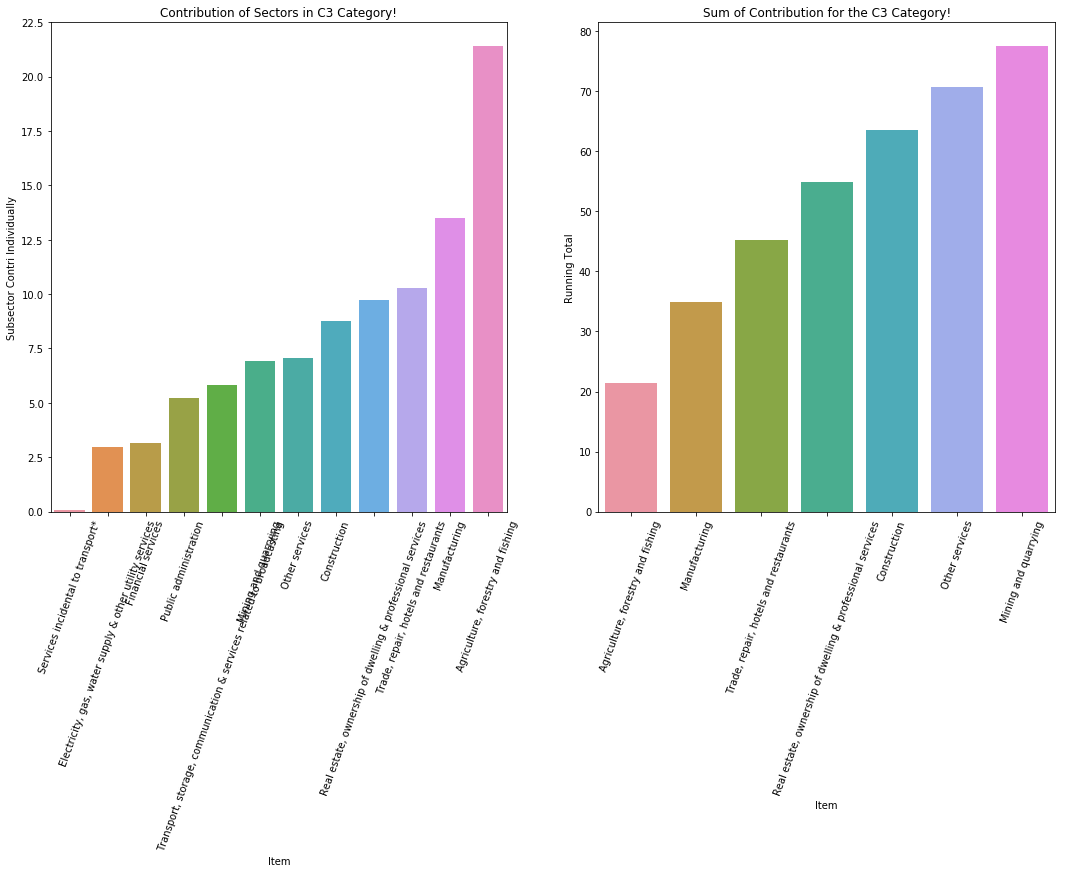

In [46]:
plt.figure(figsize=(18,9))
plt.subplot(1,2,1)
g = sns.barplot(data = c3df.sort_values(by = 'Subsector Contri Individually') , x = 'Item' , y = 'Subsector Contri Individually');
plt.xticks(rotation = 70);
plt.title('Contribution of Sectors in C3 Category!')
plt.subplot(1,2,2)
g = sns.barplot(data = c3_Top , x = 'Item' , y ='Running Total')
plt.xticks(rotation = 70);
plt.title('Sum of Contribution for the C3 Category!');
plt.savefig('C3_Subsector_contribution.jpg')

# This is for C4 Category!

In [47]:
c4df = c4.groupby(by = 'Item' ,as_index=False).sum()
not_to_be_included = ['Primary','Secondary','Tertiary','Per Capita GSDP (Rs.)',"Population ('00)",
                     'Crops','Trade & repair services','Hotels & restaurants','Livestock','Forestry and logging',
                      'Fishing and aquaculture','Railways','Road transport','Water transport','Air transport','Road transport*',
                      'Road transport**','Trade & repair services*',
'Services incidental to transport','Storage','Communication & services related to broadcasting','TOTAL GSVA at basic prices',
'Taxes on Products','Subsidies on products',]
c4df = c4df[~c4df['Item'].isin(not_to_be_included)]
Gross_State_Domestic_Product = c4df.loc[c4df.Item == 'Gross State Domestic Product','2014-15'].iloc[0]
c4df = c4df.loc[c4df.Item!= 'Gross State Domestic Product']
c4df['Subsector Contri Individually'] = round(100*(c4df['2014-15']/Gross_State_Domestic_Product),2)
c4df = c4df.sort_values(by = 'Subsector Contri Individually',ascending = False)
c4df['Running Total'] = c4df['Subsector Contri Individually'].cumsum(axis=0)

# Top contributors to 80%
c4_Top = c4df[c4df['Running Total']<=80]
c4df.iloc[:5]

,Item,2014-15,Subsector Contri Individually,Running Total
0,"Agriculture, forestry and fishing",56735044.0,24.32,24.32
30,"Trade, repair, hotels and restaurants",27484595.0,11.78,36.10
12,Manufacturing,24987032.0,10.71,46.81
20,"Real estate, ownership of dwelling & professio...",24177534.0,10.37,57.18
3,Construction,22775948.0,9.76,66.94


## Top 3 Contributors in C4 Category are 'Manufacturing','Agriculture, forestry and fishing	' , 'Trade, repair, hotels and restaurants', 'Real estate, ownership of dwelling & professional services' and 'Construction'

### Let's plot on individual Contribution and then on Running Total

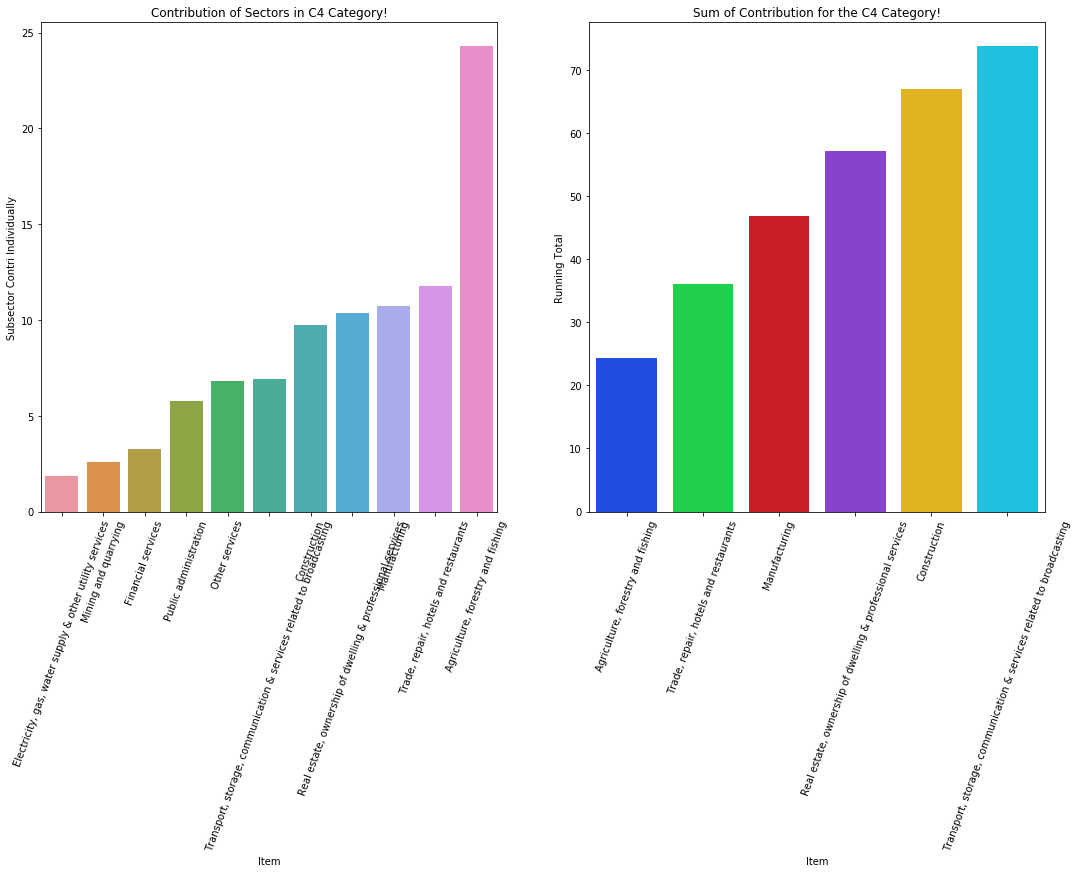

In [48]:
plt.figure(figsize=(18,9))
plt.subplot(1,2,1)
g = sns.barplot(data = c4df.sort_values(by = 'Subsector Contri Individually') , x = 'Item' , y = 'Subsector Contri Individually');
plt.xticks(rotation = 70);
plt.title('Contribution of Sectors in C4 Category!')
plt.subplot(1,2,2)
g = sns.barplot(data = c4_Top , x = 'Item' , y ='Running Total')
plt.xticks(rotation = 70);
plt.title('Sum of Contribution for the C4 Category!');
plt.savefig('C4_Subsector_contribution.jpg')

## How does the GDP distribution of the top states (C1) differ from the others?

#### The C1 Category States have the High End services such as Manufacturing has a height of 16% which goes on increasing for C2 at 17% but then it continously falls for the C3/C4 Sectors by 13 and 10%. So the States lying in C3/C4 Category need to command up their Manufacturing sector bit more in order to contribute more towards GSDP.

#### Similarly, watching closely, we found that Agriculture sector for C3/C4 has performed very very well upto 25% where the C1/C2 sectors have barely made up to 50% of their contribution.

# Which sub-sectors seem to be correlated with high GDP?

#### Manufacturing, Agriculture, Trade,Repair and Hotel Services are the obvious ones!

# Which sub-sectors do the various categories need to focus on? 

#### They definitely need to focus on Construction and Real Estate Sectors as it invites high GDP Per Capita which booms the Gross State Domestic Product(GSDP)

# Part-II: GDP and Education Dropout Rates:

In [49]:
df_gdp_education = pd.read_csv('Statewise-annual-dropout.csv')
df_gdp_education.head()

,Sl. No.,Level of Education - State,Primary - 2012-2013,Primary - 2014-2015,Primary - 2014-2015.1,Upper Primary - 2012-2013,Upper Primary - 2013-2014,Upper Primary - 2014-2015,Secondary - 2012-2013,Secondary - 2013-2014,Secondary - 2014-2015,Senior Secondary - 2012-2013,Senior Secondary - 2013-2014,Senior Secondary - 2014-2015
0,1,A & N Islands,0.68,1.21,0.51,1.23,0.51,1.69,5.56,7.20,9.87,14.14,15.87,16.93
1,2,Andhra Pradesh,3.18,4.35,6.72,3.36,3.78,5.20,12.72,12.65,15.71,0.35,11.79,NaN
2,3,Arunachal Pradesh,15.16,10.89,10.82,7.47,5.59,6.71,12.93,14.49,17.11,5.11,17.07,18.42
3,4,Assam,6.24,7.44,15.36,7.20,7.05,10.51,26.77,30.43,27.06,4.69,7.24,NaN
4,5,Bihar,NaN,2.09,NaN,NaN,2.98,4.08,30.14,25.33,25.90,NaN,NaN,NaN


In [50]:
cols_needed = ['Level of Education - State','Primary - 2014-2015.1','Upper Primary - 2014-2015','Secondary - 2014-2015']
df_gdp_education = df_gdp_education[cols_needed]
df_gdp_education = df_gdp_education[df_gdp_education['Level of Education - State'].isin(states)]
#Removing all UT's!

## Preparing the Data for Analysis!

In [51]:
gdp_per_capita = Per_Capita_GSDP.drop(['Item','Category','Group'],axis=1)
gdp_per_capita
df_gdp_education=df_gdp_education.rename(columns = {'Level of Education - State' : "State"})
df_gdp_education['State'] = df_gdp_education['State'].apply(lambda x:x.replace(" ",''))
df_gdp_education = df_gdp_education.set_index('State').rename(index={'A&NIslands':'AndamanNicobar'})
df_gdp_education.T.fillna(df_gdp_education.mean(axis=1)).T

,Primary - 2014-2015.1,Upper Primary - 2014-2015,Secondary - 2014-2015
State,,,
AndhraPradesh,6.72,5.20,15.71
ArunachalPradesh,10.82,6.71,17.11
Assam,15.36,10.51,27.06
Bihar,14.99,4.08,25.90
Goa,0.73,0.07,11.15
Gujarat,0.89,6.41,25.04
Haryana,5.61,5.81,15.89
HimachalPradesh,0.64,0.87,6.07
Jharkhand,5.48,8.99,24.00


In [52]:
final_merged_df = pd.merge(df_gdp_education,gdp_per_capita,how = 'inner',on = 'State')
final_merged_df = final_merged_df.rename(columns = {'2014-15':'Per Capita GDP of the State'})
final_merged_df = final_merged_df.dropna(axis=0)

## Let's plot the Drop Out rate for Each State!

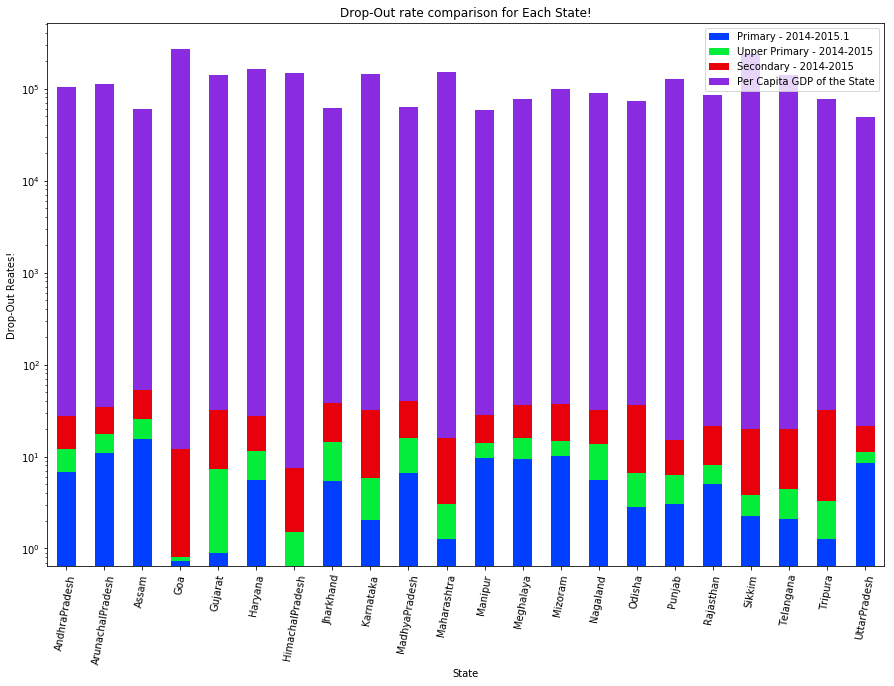

In [53]:
drop_out_rates_in_education = final_merged_df
drop_out_rates_in_education.plot(x = 'State',kind = 'bar',stacked=True,figsize = (15,10))
plt.yscale('log')
plt.xticks(rotation = 80)
plt.rc('xtick', labelsize=15) 
plt.ylabel('Drop-Out Reates!')
plt.rc('ytick', labelsize=15) 
plt.title('Drop-Out rate comparison for Each State!');
plt.savefig('Drop Out rate comparison for each State.jpg')

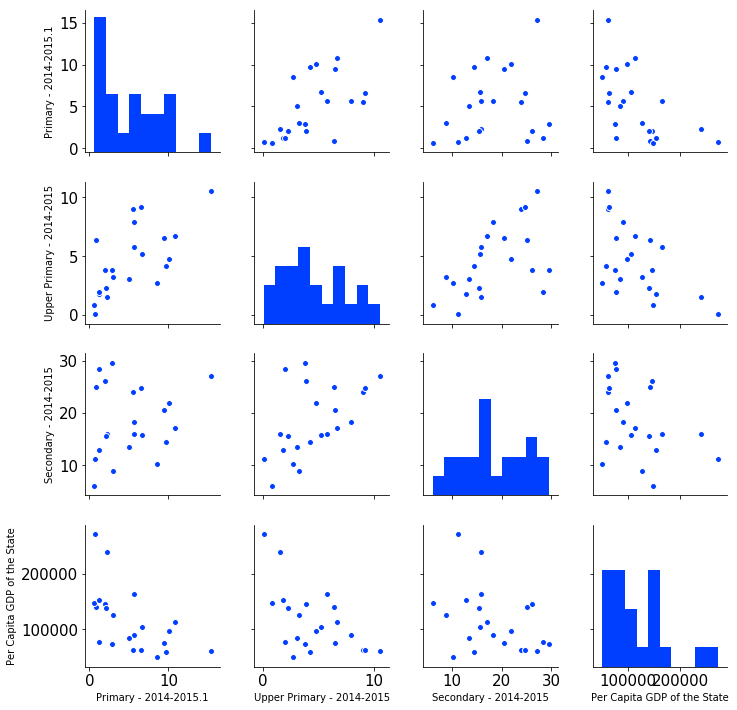

In [54]:
#final_merged_df['State']=final_merged_df['State'].astype('category')
sns.pairplot(drop_out_rates_in_education)
plt.savefig('Pairplot Comparison.jpg')
plt.show()

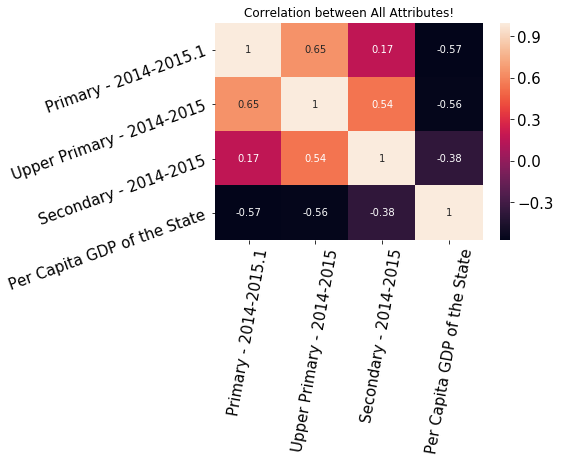

In [55]:
cor = drop_out_rates_in_education.corr();
sns.heatmap(cor,annot=True);
plt.xticks(rotation = 80);
plt.yticks(rotation = 20);
plt.title('Correlation between All Attributes!');
plt.savefig('Correlation betweenw dop out rates.jpg')

In [56]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 0 to 24
Data columns (total 5 columns):
State                          22 non-null object
Primary - 2014-2015.1          22 non-null float64
Upper Primary - 2014-2015      22 non-null float64
Secondary - 2014-2015          22 non-null float64
Per Capita GDP of the State    22 non-null float64
dtypes: float64(4), object(1)
memory usage: 1.7+ KB


In [57]:
drop_out_rates_in_education['Sum'] =round(drop_out_rates_in_education['Primary - 2014-2015.1'] + drop_out_rates_in_education['Upper Primary - 2014-2015'] + drop_out_rates_in_education['Secondary - 2014-2015'])
drop_out_rates_in_education

,State,Primary - 2014-2015.1,Upper Primary - 2014-2015,Secondary - 2014-2015,Per Capita GDP of the State,Sum
0,AndhraPradesh,6.72,5.20,15.71,104977.0,28.0
1,ArunachalPradesh,10.82,6.71,17.11,112718.0,35.0
2,Assam,15.36,10.51,27.06,60621.0,53.0
4,Goa,0.73,0.07,11.15,271793.0,12.0
5,Gujarat,0.89,6.41,25.04,141263.0,32.0
6,Haryana,5.61,5.81,15.89,164077.0,27.0
7,HimachalPradesh,0.64,0.87,6.07,147330.0,8.0
8,Jharkhand,5.48,8.99,24.00,62091.0,38.0
9,Karnataka,2.02,3.85,26.18,145141.0,32.0
11,MadhyaPradesh,6.59,9.20,24.77,62989.0,41.0


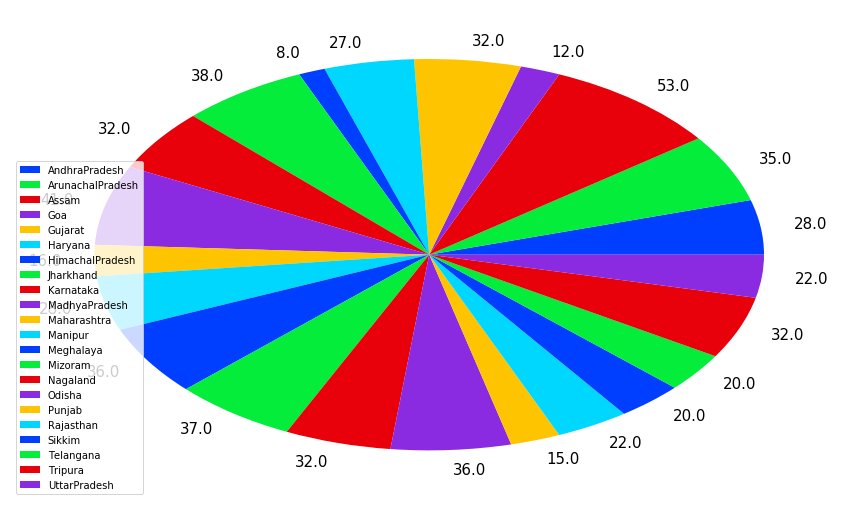

In [58]:
plt.figure(figsize=(15,9))
plt.pie(drop_out_rates_in_education.Sum,labels = drop_out_rates_in_education.Sum)
plt.legend(drop_out_rates_in_education.State,loc=3)
plt.savefig('pie chart.jpg')
plt.show()

## To check correlation between sum of Drop Out rates for different education level for each state!

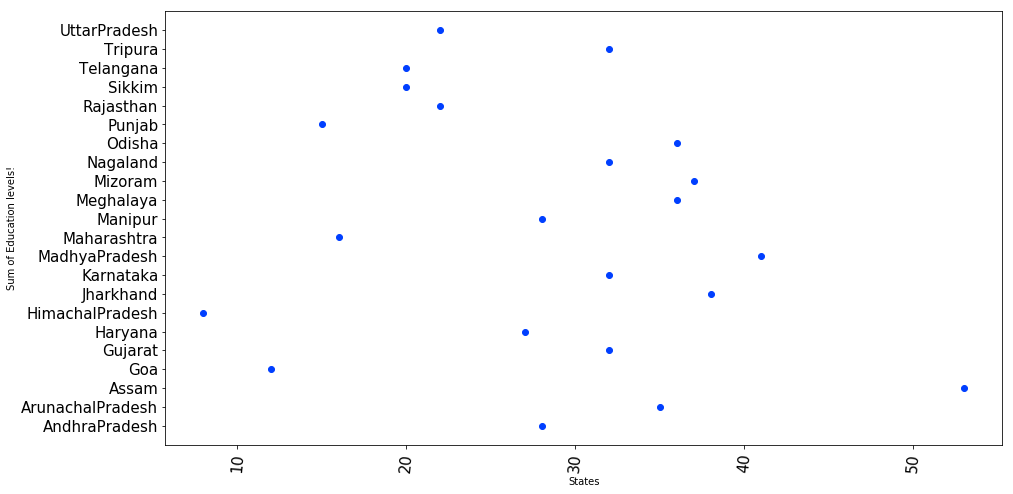

In [59]:
plt.figure(figsize=(15,8))
plt.scatter(data = drop_out_rates_in_education,y='State',x='Sum');
plt.xticks(rotation = 85);
plt.xlabel('States')
plt.ylabel('Sum of Education levels!')
plt.savefig('scatter.jpg')

## We saw that Assam has the Highest Drop out rate which leads to low in contribution towards GDP as education quality lacks there! and enthusiasm to study.

## This is supported by the Data we had, Asssam lies in C4 category that means it is in the first 20% of contribution towards the GDP.

## One valid hypothetical reason is that Assam is know for Agriculture specially in Tea. So the worker prefer to do business and maybe don't have the reach of education on a broader scale. hence, they choose to drop out and get into Agriculture for their living.!

# Thank You!